# PERFORMANCE EVALUATION
Here i will use all 3 methods of performance evaluations on a near perfectly linear generated dependent random variable.<br />
In this case I am only going to use the scikit library. If you would like to see how to perform these evaluations manually, please refer to the other files in this same repository where each method has its own file.<p/>
### METHOD 1: RESIDUAL ANALYSIS
It's a graphical visualization method; where for each sample, the difference between the predicted value and the actual value is plotted
### METHOD 2: MEAN SQUARE ERROR
The name is very descriptive, for each point you calculate the square error: $error^2=(y_ipredicted-y_ireal)^2$, and the average among them all is calculated
### METHOD 3: COEFFICIENT OF DETERMINATION
This is indicator of how well the model explains the actual data between 0 and 1.<br/> where 1 is perfectly explained (no error) and 0 when mean square error=variance. Although values can be negative when error is beyond variance.

# Generation of data and model fitting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

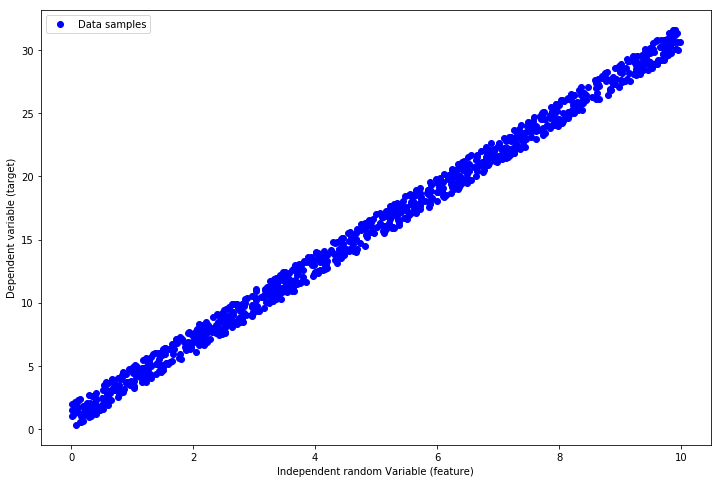

In [2]:
x=10*np.random.rand(1000) #1000 random values between 0 and 100 
y=(3*x)+2*np.random.rand(1000) #dependant variable is a linear function of x with a coefficient of 3, bias of 0 and random noise between 0 and 2
X=x.reshape(-1,1)
plt.figure(figsize=(12,8))
plt.scatter(x=x,y=y,color='blue',label='Data samples')
plt.xlabel('Independent random Variable (feature)')
plt.ylabel('Dependent variable (target)')
plt.legend(loc='upper left')
plt.show()

## Split data between training data and test data

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Test datais 20% and train data is 80% of data

## Fit the Linear Regression Model using train data and predict values for both training and test data

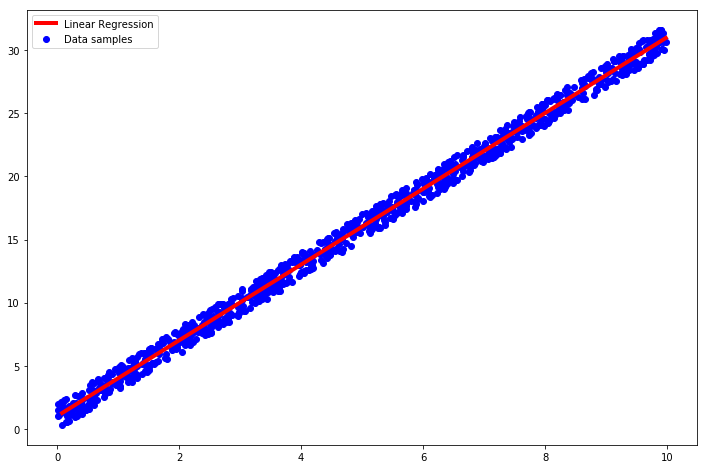

In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X=X,y=y)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
minX=np.min([X_test.min(),X_test.max()])
maxX=np.max([X_train.max(),X_test.max()])
plt.figure(figsize=(12,8))
plt.scatter(x=x,y=y,color='blue',label='Data samples')
plt.plot([minX,maxX],[model.predict(minX),model.predict(maxX)],'r',label='Linear Regression',lw=4)
plt.legend(loc='upper left')
plt.show()

# METHOD 1: RESIDUAL ANALYSIS

In [5]:
res_train=y_train_pred-y_train
res_test=y_test_pred-y_test

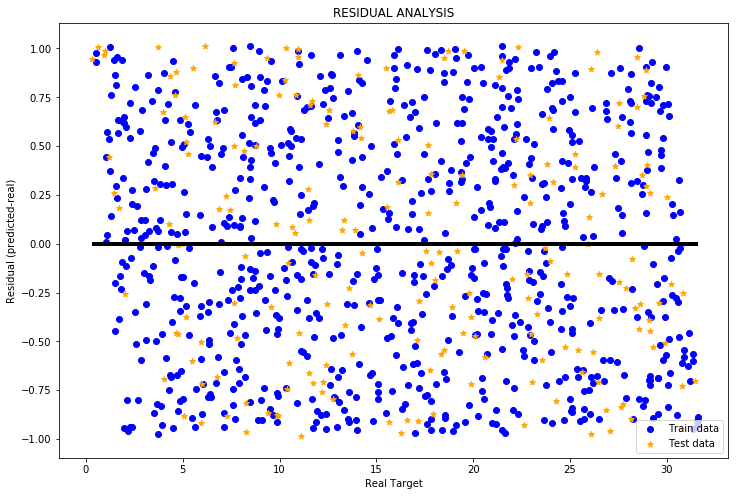

In [6]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_train,y=res_train,label='Train data',color='blue',marker='o')
plt.scatter(x=y_test,y=res_test,label='Test data',color='orange',marker='*')
plt.xlabel('Real Target')
plt.ylabel('Residual (predicted-real)')
plt.title('RESIDUAL ANALYSIS')
plt.legend(loc='lower right')
plt.hlines(y=0,xmin=np.min([y_train.min(),y_test.min()]),xmax=np.max([y_train.max(),y_test.max()]),lw=4)
plt.show()

In this nearly ideal case we can see that the error is very consistent across all the samples and very minimum in comparison with the actual target, its barely noise.

# METHOD 2: MEAN SQUARED ERROR

In [7]:
from sklearn.metrics import mean_squared_error as MSE
mse_train=MSE(y_true=y_train,y_pred=y_train_pred)
mse_test=MSE(y_true=y_test,y_pred=y_test_pred)
print('TRAIN DATA MEAN SQUARED ERROR=%f\n\rTEST DATA MEAN SQUARED ERROR=%f'%(mse_train,mse_test))

TRAIN DATA MEAN SQUARED ERROR=0.346456
TEST DATA MEAN SQUARED ERROR=0.376615


As we can see this is a very small value and is consistent with what we saw on the Residual Analysis

# METHOD 3: COEFFICIENT OF DETERMINATION

In [8]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
print('TRAIN R^2=%f\n\rTEST R^2=%f'%(r2_train,r2_test))

TRAIN R^2=0.995469
TEST R^2=0.994989


The coefficient of determination on both cases is almost 1 on both instances, which means that in relation to the variance of the data, the mean square error is minimum